In [1]:
import re

#### Challenge:
create a function that places commas inside strings of integers, eg, input = '1000', output = '1,000'

In [2]:
# not great
def format_number(n):
    n = n[::-1]
    s = ''
    ps = len(n)//3
    r = len(n)%3
    for p in range(ps):
        if r==0 and p+1==ps:
            s = s + n[p*3:(p+1)*3]
        else:
            s = s + n[p*3:(p+1)*3] + ','
    s = s + n[ps*3:]
    return s[::-1]

In [3]:
# better
def format_number2(n):
    result = ""
    n = str(n)[::-1]
    for i, digit in enumerate(n):
        if i != 0 and (i % 3) == 0:
            result += ","
        result += digit
    return result[::-1]

In [4]:
display(format_number('1000000'))
display(format_number2('1000000'))
display(format_number('100000000'))
display(format_number2('100000000'))

'1,000,000'

'1,000,000'

'100,000,000'

'100,000,000'

#### Challenge:
Write a function in Python to check duplicate letters. It must accept a string, i.e., a sentence. The function should return True if the sentence has any word with duplicate letters, else return False. 

In [5]:
def letter_duplicates(x)->bool:
    '''this will take a list of words or a sentence string and return a boolean corresponding 
        to the desired outcome as defined by the rule: return True if the sentence contains
        a word that has duplicate letter. The instructions do not mention if the letters must
        be consecutive in order. I assume they must be.
        
        I've modified the output from the request. I want to see a dictionary with each word
        corresponding to the boolean.'''
    
    if not isinstance(x,str) and not isinstance(x,list):
        raise Exception('Enter a list of words or a sentence string')
    if isinstance(x,list):
        for i in x:
            if not isinstance(i,str):
                raise Exception('The contents of the list must all be strings')
    
    def word(w):
        t0 = w[0]
        for e in w[1:]:
            if t0 == e:
                return True
            t0 = e
        return False
    
    if isinstance(x,list):
        results = {}
        for w in x:
            d = word(w)
            if d:
                results[w] = d
        return results
    
    elif isinstance(x,str):
        result = {}
        sentence = x.split()
        for w in sentence:
            d = word(w)
            if len(w)>1 and d:
                result[w] = d
        return result
    

In [6]:
test_words = ['elephant','resuscitate','planning','broom','zoology','category','euphemism','seed']
test_sentence = 'I left the dinner early as I was planning on stopping by the grocery to pick up coffee.'

In [7]:
print(letter_duplicates(test_words))
print(letter_duplicates(test_sentence))

{'planning': True, 'broom': True, 'zoology': True, 'seed': True}
{'dinner': True, 'planning': True, 'stopping': True, 'coffee.': True}


In [8]:
print(letter_duplicates(['maverick',90210]))

Exception: The contents of the list must all be strings

In [ ]:
print(letter_duplicates(90210))

#### Challenge:
Write a Morse code translator

I'll use an * for a one unit dot, an --- for a one unit dash, and a . to signify space

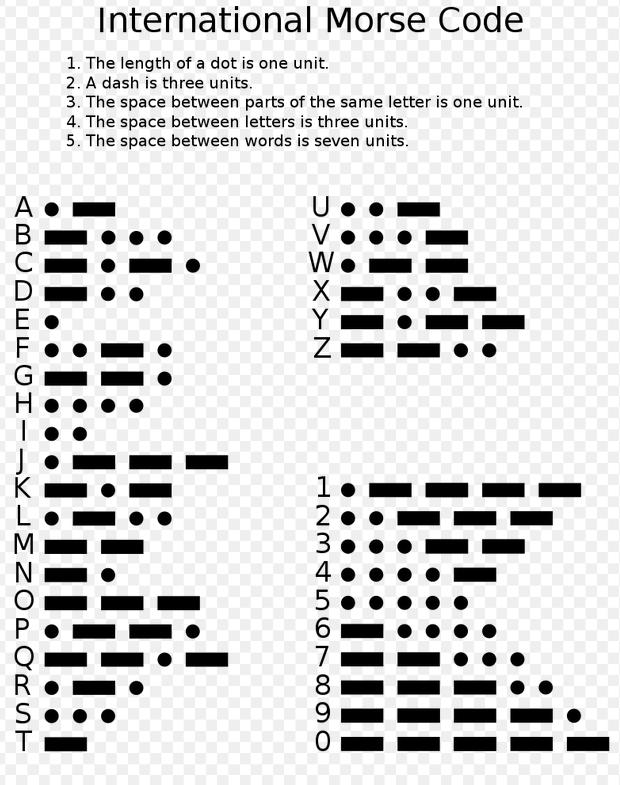

In [9]:
morseDict = {'a':'*.---','b':'---.*.*.*','c':'---.*.---.*','d':'---.*.*','e':'*','f':'*.*.---.*','g':'*.*.*',
           'h':'*.*.*.*','i':'*.*','j':'*.---.---.---','k':'---.*.---','l':'*.---.*.*','m':'---.---','n':'---.*',
           'o':'---.---.---','p':'*.---.---.*','q':'---.---.*.---','r':'*.---.*','s':'*.*.*','t':'---','u':'*.*.---',
           'v':'*.*.*.---','w':'*.---.---','x':'---.*.*.---','y':'---.*.---.---','z':'---.---.*.*'}
# I created this dictionary backwards by mistake. 
morse = {v:k for k,v in morseDict.items()}

In [10]:
string = '---.---...---.---.---...*.---.*...*.*.*...*.......---.*.---.*...---.---.---...---.*.*...*.......*.*...*.*.*.......---...*...---.*.*...*.*...---.---.---...*.*.---...*.*.*'
string2 = '*.*.*.*...*.---...---.*.---.*...---.*.---...*...---.*.*.......*.*.---.*...*.---...*.*.*...---'


In [11]:
def decoder(X):
    
    def get_word(W):
        wd = W.split('...')
        s = ''
        for w in wd:
            s += morse[w]
        return s
    
    sentence = ''
    words = X.split('.......')
    for w in words:
        compiled_word = get_word(w)
        sentence = sentence + ' ' + compiled_word

    return sentence.strip()
    

In [12]:
decoder(string)

'morse code is tedious'

In [13]:
decoder(string2)

'hacked fast'

#### Challenge:
Write a function in Python to parse a string such that it accepts a parameter - an encoded string. This encoded string will contain a first name, last name, and an id. You can separate the values in the string by any number of zeros. The id will not contain any zeros. The function should return a Python dictionary with the first name, last name, and id values. For example, if the input would be "John000Doe000123". Then the function should return: { "first_name": "John", "last_name": "Doe", "id": "123" }

In [14]:
def name_detect(X:str)->dict:
    
    temp_string = ''
    zero = False
    
    for x in X:
        if x=='0':
            zero = True
        elif x!='0' and zero:
            temp_string = temp_string+' '+x
            zero = False
        else:
            temp_string += x
            
    name_list = temp_string.split(' ')

    return {'first_name':name_list[0],'last_name':name_list[1],'id':name_list[2]}

In [15]:
display(name_detect('John00Doe0000014212'))
display(name_detect('Christopher0000Hitchens0036345'))
display(name_detect('Theodore00Roosevelt000000000000024529384'))

{'first_name': 'John', 'last_name': 'Doe', 'id': '14212'}

{'first_name': 'Christopher', 'last_name': 'Hitchens', 'id': '36345'}

{'first_name': 'Theodore', 'last_name': 'Roosevelt', 'id': '24529384'}

In [16]:
def name_detect_regex(X:str)->dict:
    pattern = re.compile('[0]+')
    name_list = pattern.split(X)
    
    return {'first_name':name_list[0],'last_name':name_list[1],'id':name_list[2]}

In [17]:
display(name_detect_regex('John00Doe0000014212'))
display(name_detect_regex('Christopher0000Hitchens0036345'))
display(name_detect_regex('Theodore00Roosevelt000000000000024529384'))

{'first_name': 'John', 'last_name': 'Doe', 'id': '14212'}

{'first_name': 'Christopher', 'last_name': 'Hitchens', 'id': '36345'}

{'first_name': 'Theodore', 'last_name': 'Roosevelt', 'id': '24529384'}